In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("housing.csv")

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#Almost 200 values missing in total_bedroom 
# let's remove it
data.dropna(inplace = True) # will replace data with non null values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
# Target variable is 'median_house_value'

# let's split the data into training and testing
# we split data so that we can train a model on a train set and test the model on test set 
from sklearn.model_selection import train_test_split
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.25)

In [9]:
# Now combine train sets so that test dets remained untouched
trained_data = X_train.join(y_train)

In [10]:
trained_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
12284,-116.81,33.90,17.0,2009.0,469.0,820.0,381.0,1.3286,INLAND,81800.0
17211,-119.71,34.42,31.0,1643.0,499.0,1253.0,499.0,3.1563,<1H OCEAN,267000.0
12366,-116.46,33.79,10.0,6960.0,1487.0,1130.0,661.0,2.1411,INLAND,136400.0
9880,-121.79,36.64,11.0,32627.0,6445.0,28566.0,6082.0,2.3087,<1H OCEAN,118800.0
19828,-119.39,36.55,30.0,1669.0,314.0,837.0,325.0,3.3869,INLAND,80400.0
...,...,...,...,...,...,...,...,...,...,...
19154,-122.69,38.37,8.0,6322.0,1001.0,2969.0,1043.0,4.8233,<1H OCEAN,214000.0
7719,-118.11,33.93,35.0,2670.0,493.0,1196.0,488.0,3.8427,<1H OCEAN,283500.0
7259,-118.17,34.01,36.0,1657.0,425.0,1689.0,418.0,2.7799,<1H OCEAN,149300.0
3146,-118.51,35.16,7.0,4371.0,727.0,1932.0,654.0,4.6250,INLAND,136800.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

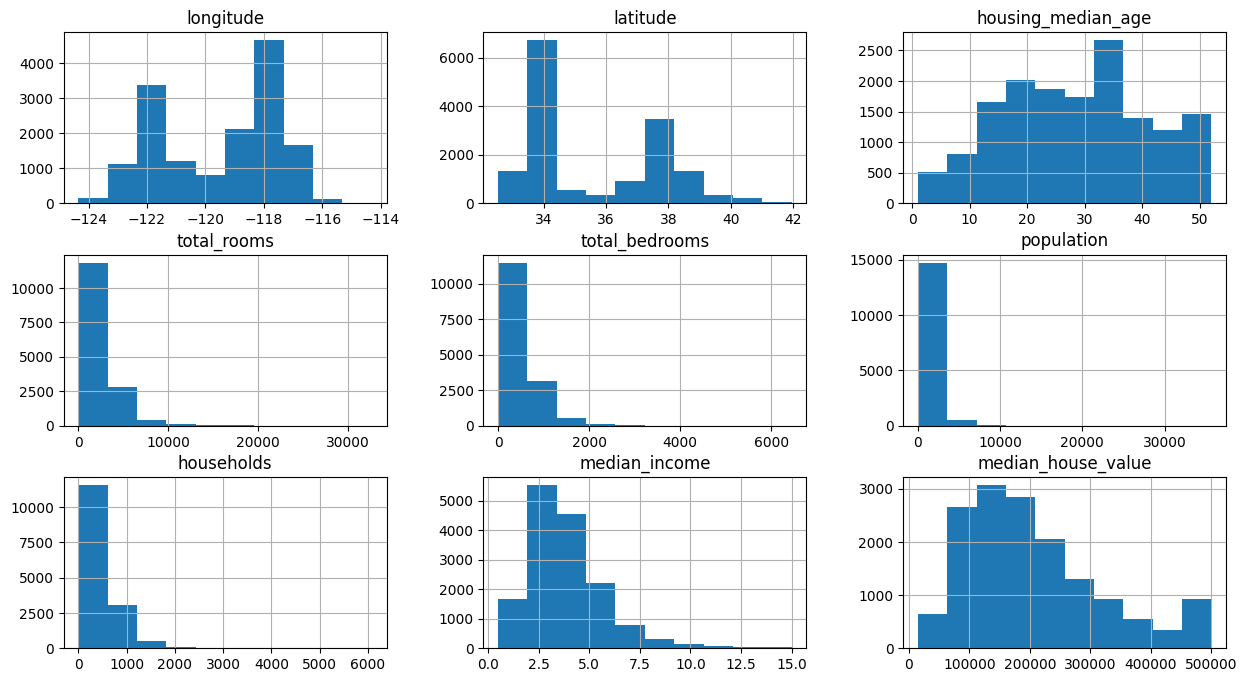

In [11]:
# Basic Exploration of Numeric features
trained_data.hist(figsize = (15,8))

# Here you can see distribution of varius features
# Right skewed distribution

In [12]:
# Use seaborn to visulaize a correlation matrix
trained_data.corr(numeric_only = True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924599,-0.109656,0.049134,0.075630,0.104317,0.062207,-0.016935,-0.048483
latitude,-0.924599,1.000000,0.012788,-0.040356,-0.073546,-0.114583,-0.078769,-0.077699,-0.141245
housing_median_age,-0.109656,0.012788,1.000000,-0.365217,-0.320631,-0.296416,-0.302578,-0.120379,0.107923
total_rooms,0.049134,-0.040356,-0.365217,1.000000,0.929774,0.849185,0.915824,0.197921,0.136853
total_bedrooms,0.075630,-0.073546,-0.320631,0.929774,1.000000,0.871344,0.978279,-0.009446,0.051316
population,0.104317,-0.114583,-0.296416,0.849185,0.871344,1.000000,0.903072,-0.001290,-0.026933
households,0.062207,-0.078769,-0.302578,0.915824,0.978279,0.903072,1.000000,0.011602,0.066586
median_income,-0.016935,-0.077699,-0.120379,0.197921,-0.009446,-0.001290,0.011602,1.000000,0.690227
median_house_value,-0.048483,-0.141245,0.107923,0.136853,0.051316,-0.026933,0.066586,0.690227,1.000000


<Axes: >

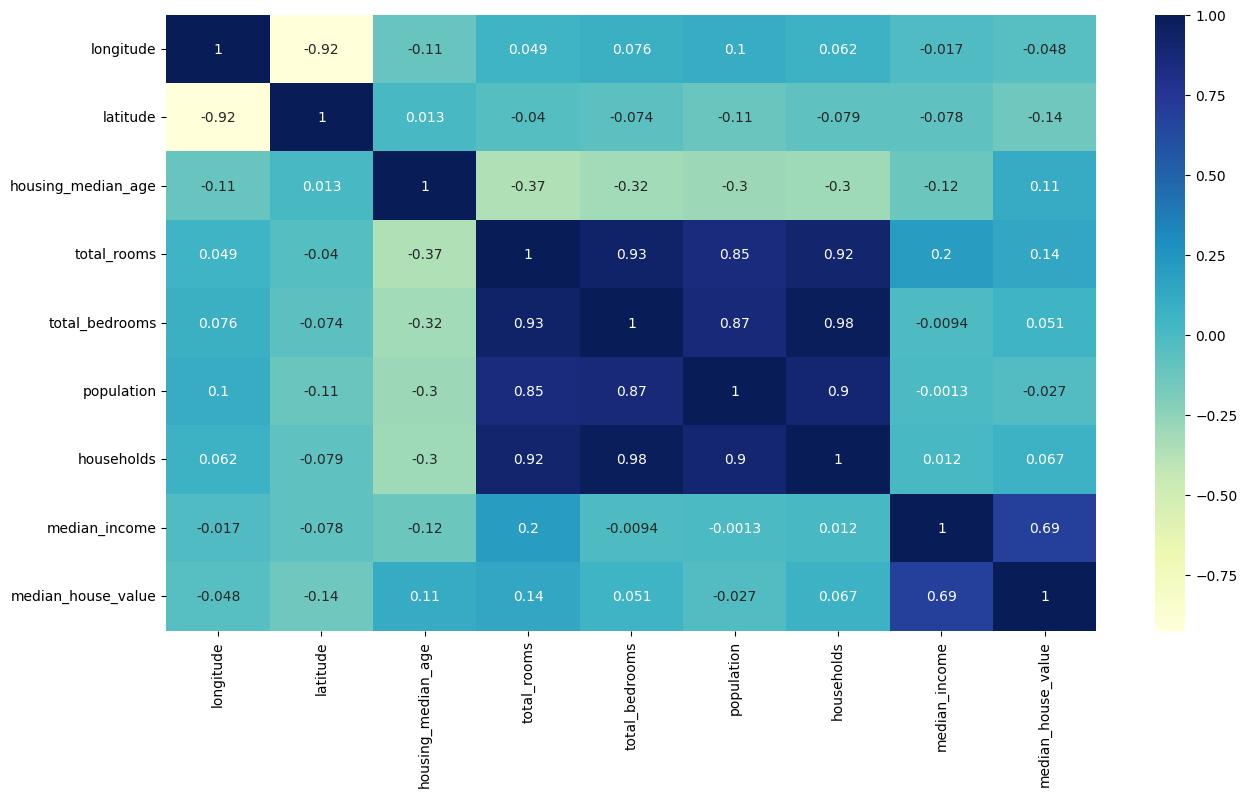

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(trained_data.corr(numeric_only = True), annot=True, cmap="YlGnBu") #cmap is colur map

# We can find the correlations betweeen variables in datasets
# Here find out that median Income positively correlated with median house value
# Here find out that median Income negetively correlated with latitude

In [14]:
# DATA Preprocessing
# lets use log 
trained_data['total_rooms'] = np.log(trained_data['total_rooms'] + 1)
trained_data['total_bedrooms'] = np.log(trained_data['total_bedrooms'] + 1)
trained_data['population'] = np.log(trained_data['population'] + 1)
trained_data['households'] = np.log(trained_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

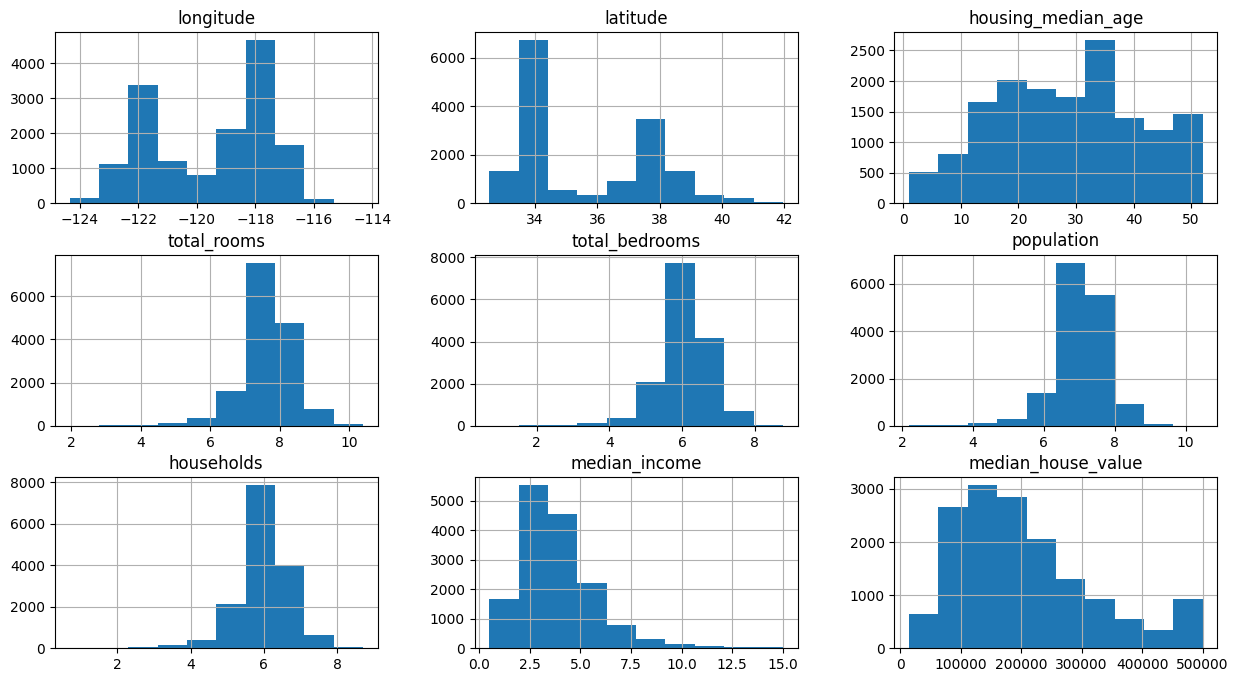

In [15]:
trained_data.hist(figsize = (15, 8))

# Loots like gaussian bell now

In [16]:
trained_data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     6819
INLAND        4859
NEAR OCEAN    1956
NEAR BAY      1686
ISLAND           4
Name: count, dtype: int64

In [17]:
# lets give binany(yes or no) to ocean proximity
pd.get_dummies(trained_data['ocean_proximity'], dtype= 'int')

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12284,0,1,0,0,0
17211,1,0,0,0,0
12366,0,1,0,0,0
9880,1,0,0,0,0
19828,0,1,0,0,0
...,...,...,...,...,...
19154,1,0,0,0,0
7719,1,0,0,0,0
7259,1,0,0,0,0
3146,0,1,0,0,0


In [18]:
# join pd_dummies data set to trained data set and drop column ocean_proximity
trained_data = trained_data.join(pd.get_dummies(trained_data['ocean_proximity'], dtype= 'int')).drop(['ocean_proximity'], axis = 1)

In [19]:
trained_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12284,-116.81,33.90,17.0,7.605890,6.152733,6.710523,5.945421,1.3286,81800.0,0,1,0,0,0
17211,-119.71,34.42,31.0,7.404888,6.214608,7.134094,6.214608,3.1563,267000.0,1,0,0,0,0
12366,-116.46,33.79,10.0,8.848078,7.305188,7.030857,6.495266,2.1411,136400.0,0,1,0,0,0
9880,-121.79,36.64,11.0,10.392926,8.771215,10.260007,8.713253,2.3087,118800.0,1,0,0,0,0
19828,-119.39,36.55,30.0,7.420579,5.752573,6.731018,5.786897,3.3869,80400.0,0,1,0,0,0


<Axes: >

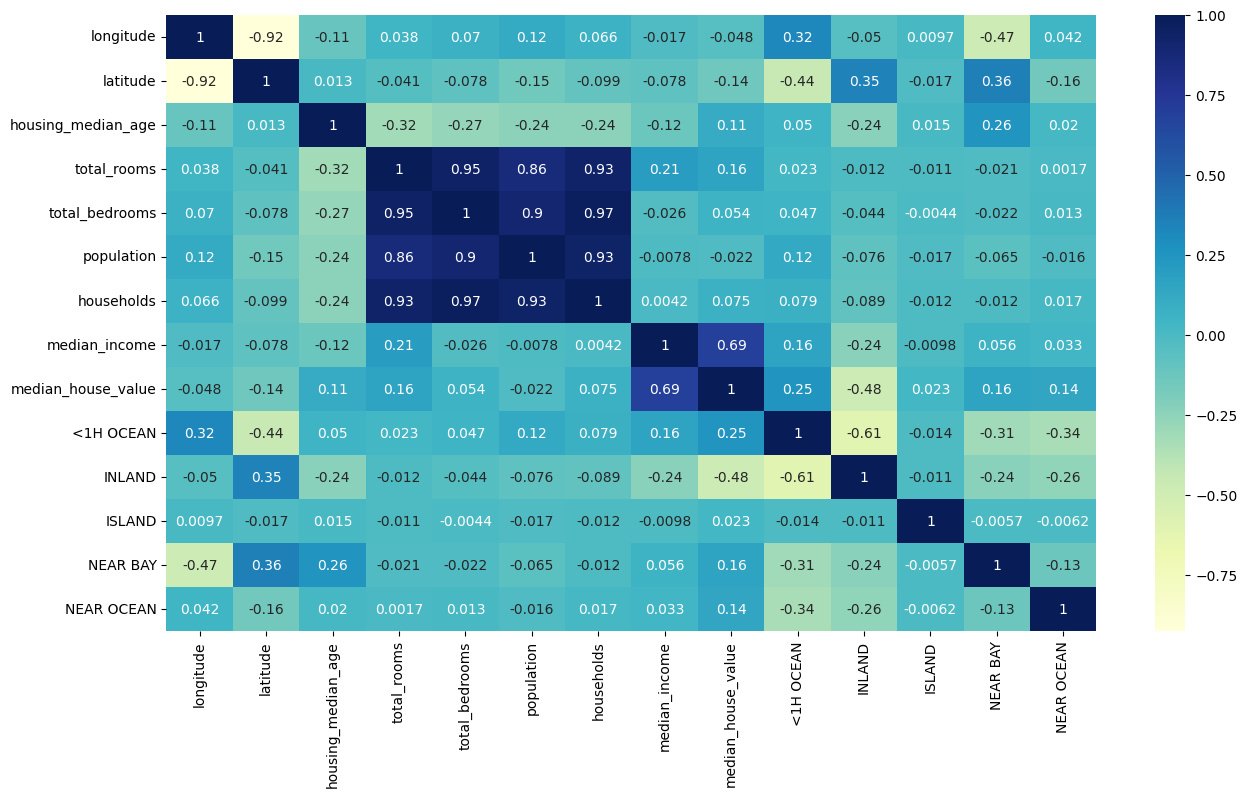

In [20]:
# find the correlation after log
plt.figure(figsize=(15,8))
sns.heatmap(trained_data.corr(numeric_only = True), annot=True, cmap="YlGnBu")

<Axes: xlabel='longitude', ylabel='latitude'>

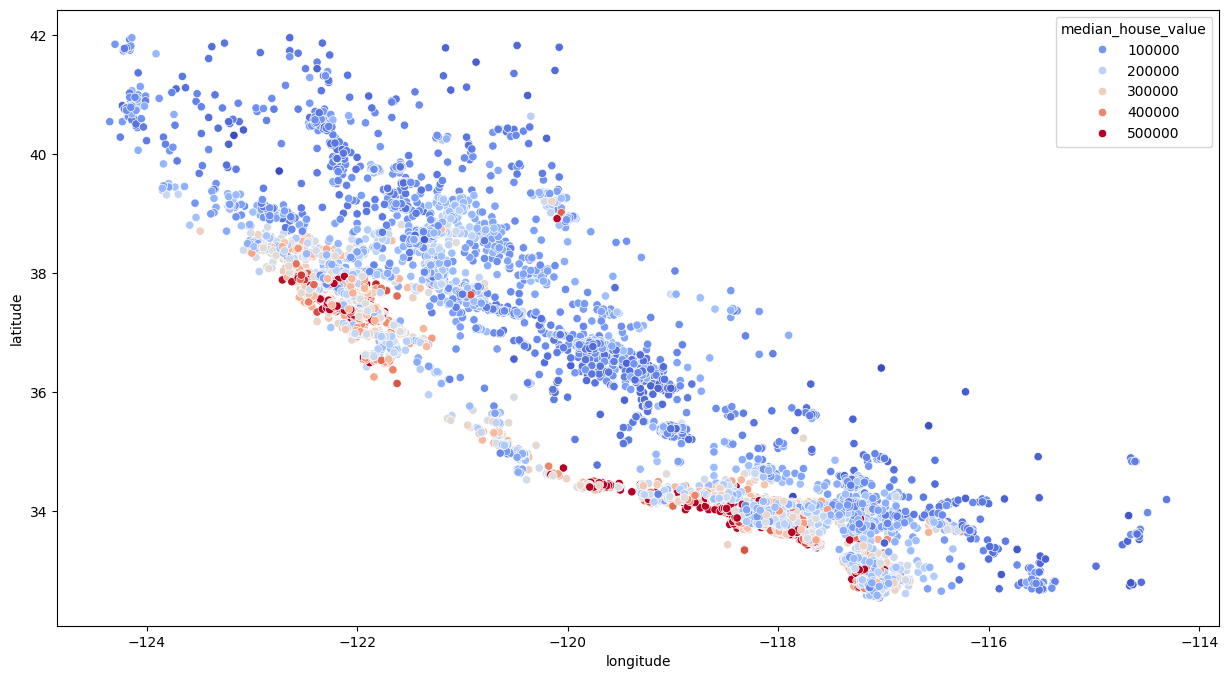

In [21]:
# Feature Engineering
# let's check the house pricing as per locations
plt.figure(figsize = (15,8))
sns.scatterplot(data = trained_data, x = 'longitude', y = 'latitude', hue = 'median_house_value', palette = 'coolwarm') # hue will plot the points or scatters, palette will show colours of scatter

# we can see that houses which are close to coastal areas have high price

In [22]:
# How many rooms of rooms are bedrooms?
trained_data['total_bedrooms_ratio'] = trained_data['total_bedrooms']/trained_data['total_rooms']

# How many rooms in house hold
trained_data['household_rooms'] = trained_data['total_rooms']/trained_data['households']

In [23]:
trained_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,total_bedrooms_ratio,household_rooms
12284,-116.81,33.90,17.0,7.605890,6.152733,6.710523,5.945421,1.3286,81800.0,0,1,0,0,0,0.808943,1.279285
17211,-119.71,34.42,31.0,7.404888,6.214608,7.134094,6.214608,3.1563,267000.0,1,0,0,0,0,0.839258,1.191529
12366,-116.46,33.79,10.0,8.848078,7.305188,7.030857,6.495266,2.1411,136400.0,0,1,0,0,0,0.825624,1.362235
9880,-121.79,36.64,11.0,10.392926,8.771215,10.260007,8.713253,2.3087,118800.0,1,0,0,0,0,0.843960,1.192772
19828,-119.39,36.55,30.0,7.420579,5.752573,6.731018,5.786897,3.3869,80400.0,0,1,0,0,0,0.775219,1.282307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19154,-122.69,38.37,8.0,8.751949,6.909753,7.996317,6.950815,4.8233,214000.0,1,0,0,0,0,0.789510,1.259126
7719,-118.11,33.93,35.0,7.890208,6.202536,7.087574,6.192362,3.8427,283500.0,1,0,0,0,0,0.786105,1.274184
7259,-118.17,34.01,36.0,7.413367,6.054439,7.432484,6.037871,2.7799,149300.0,1,0,0,0,0,0.816692,1.227811
3146,-118.51,35.16,7.0,8.382976,6.590301,7.566828,6.484635,4.6250,136800.0,0,1,0,0,0,0.786153,1.292744


<Axes: >

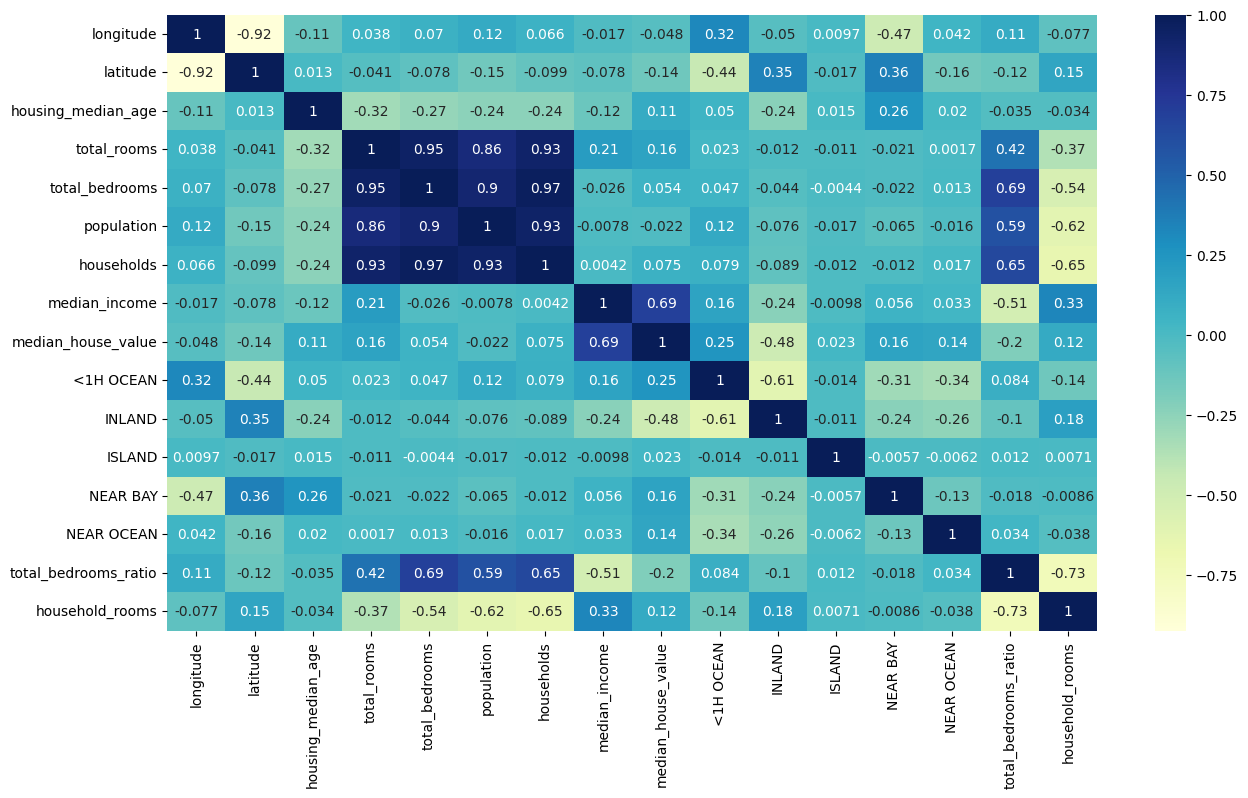

In [24]:
# find the correlation after total_bedrooms_ratio and household_rooms
plt.figure(figsize=(15,8))
sns.heatmap(trained_data.corr(numeric_only = True), annot=True, cmap="YlGnBu")

In [25]:
# Machine learning
# Linear Regression Model

# Import library
from sklearn.linear_model import LinearRegression
# to scale the data

from sklearn.preprocessing import StandardScaler
# scalar will help to focus on centric data, removing outliers
scaler = StandardScaler()

# lets train data to fit in linear regression
x_train, y_train = trained_data.drop(['median_house_value'], axis =1), trained_data['median_house_value']

# transform data into scaler
x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()

# lets fit trained data
reg.fit(x_train_s, y_train)

LinearRegression()

In [26]:
# Perform all the functions which was performed in trained data set

test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data['ocean_proximity'], dtype= 'int')).drop(['ocean_proximity'], axis = 1)

test_data['total_bedrooms_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']

In [27]:
x_test, y_test = test_data.drop(['median_house_value'], axis =1), test_data['median_house_value']

In [28]:
# transform test data in scaler 
x_test_s = scaler.transform(x_test)

In [29]:
# will give the test results
reg.score(x_test_s, y_test)

0.6640546480961212

In [30]:
# Random forest regresso
# It is used for better predictions
# It predict multiple trees in data and put the average of all predictions
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()

# already data is scaled
forest.fit(x_train_s,y_train)

RandomForestRegressor()

In [31]:
forest.score(x_test_s, y_test)

0.8102507738568304

In [33]:
# let's try in grid search cross validation, one of hyper parameter tunning
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

# Here we specify the different parameters that we want to try
param_grid = {

    # how many decision trees to be used
    'n_estimators' : [100, 200, 300], # default = 100

    # how nany columns will be provided to each tree
    # 'max_features' : [2, 4, 6, 8],

    # How many samples we need tp split a node
    'min_samples_split' : [2, 4], # default = 2
    
    #max dept for every decision tree
    'max_depth' : [None, 4, 8]

    #max samples to be taken from tree

    
}
# cross validation works like this, 3 estimators with 2 max features then 4 max feature....... 30 estimators with 8 max features

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring = 'neg_mean_squared_error', return_train_score = True)
# cv = 5 train the Random forest upto 5 times
# scoring to get positive scoring only

grid_search.fit(x_train_s,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [35]:
# will give the best estimator in grid search
grid_search.best_estimator_

RandomForestRegressor(min_samples_split=4, n_estimators=200)

In [36]:
grid_search.best_estimator_.score(x_test_s, y_test)

0.8101034167662762